In [2]:
# uncomment this line if you need to install pyphyschemtools
# !pip install pyphyschemtools


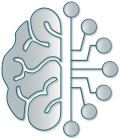

**Environment initialized:** Thursday 19 February 2026, 15:01:10 on insa-12842

In [4]:
# This now triggers vID.init() automatically via __init__.py
import pyphyschemtools as t4pPC
from pyphyschemtools import fg, hl, bg, color

t4pPC.init('t4pPC')
%matplotlib inline

# get_ppct_data() is a helper function made to easily retrieve absolute paths for built-in example files (XYZ, Excel, etc.)
# that are available in the data_examples/ subfolder as part of the pyphyschemtools library

# This get_ppct_data() utility is specifically designed for accessing built-in example data bundled
# with pyphyschemtools. For your own local files, please use standard Python paths or pathlib

from pyphyschemtools import get_ppct_data


# tools for pyPhysChem - aka pyPhysChemTools. Examples

[![PyPI version](https://img.shields.io/pypi/v/pyphyschemtools.svg)](https://pypi.org/project/pyphyschemtools/)
[![Documentation Status](https://readthedocs.org/projects/pyphyschemtools/badge/?version=latest)](https://pyphyschemtools.readthedocs.io/en/latest/?badge=latest)
[![License](https://img.shields.io/github/license/rpoteau/pyphyschemtools)](https://github.com/rpoteau/pyphyschemtools/blob/main/LICENSE)
[![Downloads](https://img.shields.io/pypi/dm/pyphyschemtools)](https://pypi.org/project/pyphyschemtools/)
[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.18644730.svg)](https://doi.org/10.5281/zenodo.18644730)

## `cheminformatics.py`

### `easy_rdkit` class

#### Basic use

While standard chemical drawings often omit conjugation or hybridization states, easy_rdkit allows for their explicit visualization, making it an ideal tool for teaching structural organic chemistry.

In [ ]:
import pyphyschemtools as t4pPC
from pyphyschemtools import easy_rdkit

mol = easy_rdkit("CC(=O)NC1=CC=C(C=C1)O")
mol.fetch_pubchem_data()

t4pPC.centerTitle("Aromatic part")
mol.show_mol(plot_aromatic=True)

t4pPC.centerTitle("Conjugated part")
mol.show_mol(plot_conjugation=True, show_n=True)


#### Comprehensive Electronic View: Lewis structure

This example showcases how `easy_rdkit` simplifies the transition from a SMILES string to a detailed basic electronic analysis. By enabling the Lewis and hybridization flags, the library automatically calculates and overlays lone pairs, electron vacancies, and orbital states directly onto the molecular graph, providing a clear visual bridge between chemical structure and bonding theory.

In [ ]:
import pyphyschemtools as t4pPC
from pyphyschemtools import easy_rdkit

t4pPC.centerTitle("Lewis & hybridization")
mol = easy_rdkit("CC(=O)NC1=CC=C(C=C1)O", lang="Fr")
mol.show_mol(show_Lewis=True, show_n=True, show_hybrid=True, size=(600,400))


#### Fetching a molecule directly from PubChem

PubChem is the world's largest collection of freely accessible chemical information, maintained by the National Institutes of Health (NIH). It serves as a comprehensive authority for chemical structures, identifiers, and biological activities.

By integrating the PubChem Compound ID (CID) system, easy_rdkit allows you to bypass manual string entry. This ensures that the molecular structure is retrieved directly from a standardized, peer-reviewed source, significantly reducing errors for complex scaffolds.

In [ ]:
import pyphyschemtools as t4pPC
from pyphyschemtools import easy_rdkit

mol = easy_rdkit.from_cid(2519) #cafeine

t4pPC.centerTitle("Caffeine from PubChem")
mol.show_mol(plot_conjugation=True)
print(f"compound {mol.cid} = {mol.iupac_name}\nRDKit-canonicalized SMILES = {mol.smiles}")

#### Mastering complex geometries

Macrocycles (large rings) are notoriously difficult to represent clearly in 2D. Using the `macrocycle=True` flag triggers an optimized coordinate generation algorithm.


In [ ]:
import pyphyschemtools as t4pPC
from pyphyschemtools import easy_rdkit

t4pPC.centerTitle("Better representation of macrocycles")
t4pPC.centertxt("without the 'macrocycle' option")
mol = easy_rdkit("C/C=C/CC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C)C(CC(C)C)C(=O)NC(C(C)C)C(=O)N(C)C(CC(C)C)C(=O)NC(C)C(=O)NC(C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(C(C)C)C(=O)N1C")
mol.fetch_pubchem_data()
mol.show_mol()
t4pPC.centertxt("with the 'macrocycle' option")
mol.show_mol(macrocycle=True)

#### Assigning Stereochemistry in SMILES

Stereochemistry is assigned in SMILES with the @ and / symbols. Let's consider 2-penten-4-ol. Its flat SMILES is `O[CH](C)C=CC`, whereas the isomeric "4S, 2E" SMILES is `O[C@@H](C)/C=C/C` :
- **Chirality (@ or @@)**: The @@ specifically identifies the spatial arrangement of the Oxygen, Hydrogen, and Methyl groups.
    - @ = chirality, anticlockwise
    - @@ = chirality, clockwise
      
  In this case, it corresponds to the S configuration.
- **Double Bond Geometry (/ and \\)**: The slashes act like "directional indicators" around the double bond.
    - `/C=C/` or `\C=C\` indicates Trans (E) geometry (the groups are on opposite sides).
    - `/C=C\` or `\C=C/` indicates Cis (Z) geometry (the groups are on the same side).

In [ ]:
import pyphyschemtools as t4pPC
from pyphyschemtools import easy_rdkit

t4pPC.centerTitle("With the appropriate SMILES, rdkit can handle stereochemistry")
mol = easy_rdkit("O[C@@H](C)/C=C/C")
mol.fetch_pubchem_data()
mol.show_mol(size=(300,200))
t4pPC.centerTitle("Show stereo centers and the stereochemistry of double bonds")
mol.show_mol(show_stereo=True, size=(300,200))

t4pPC.centerTitle("A warning message will be returned if there is no stereochemistry")
t4pPC.centertxt("2-penten-4-ol", bgc="#6c1c1c", weight="bold")
mol = easy_rdkit("O[CH](C)C=CC")
mol.fetch_pubchem_data()
mol.show_mol(show_stereo=True, size=(300,200))

t4pPC.centertxt("propanol", bgc="#6c1c1c", weight="bold")
mol = easy_rdkit("CCCO")
mol.show_mol(show_stereo=True, size=(300,200))

t4pPC.centertxt("propene", bgc="#6c1c1c", weight="bold")
mol = easy_rdkit("CC=C")
mol.show_mol(show_stereo=True, size=(300,200))

t4pPC.centertxt("2-butene", bgc="#6c1c1c", weight="bold")
mol = easy_rdkit("CC=CC")
mol.show_mol(show_stereo=True, size=(300,200))

#### Find stereoisomers

When a molecule has *n* stereocenters, it can exist as up to 2<sup>n</sup> stereoisomers. Instead of manually writing every SMILES string, we can use the `get_isomers()` function of `easy_rdkit` to explore the possibilities.

In [ ]:
import pyphyschemtools as t4pPC
from pyphyschemtools import easy_rdkit

t4pPC.centerTitle("Flat SMILES for 2-butene")
mol = easy_rdkit("CC=CC")
mol.show_mol(size=(300,200))

t4pPC.centerTitle("rdkit search for stereoisomers")
isomers = mol.get_isomers()
mol.show_isomers(mols_per_row=2, size=(300,300), save_img="fig_examples/Molecules/grid_stereo.svg")

t4pPC.centerTitle("Let's look at the first one specifically")
isomers[0].show_mol(show_stereo=True, size=(300,200), show_n=True)

t4pPC.centerTitle("IUPAC names and PubChem CIDs")
for iso in isomers:
    iso.fetch_pubchem_data()

#### Calculation of molecular descriptors

This example highlights the seamless integration with PubChem and the automated extraction of molecular properties. By initializing a molecule via its Compound ID (CID), the library automatically retrieves the official IUPAC name and canonical SMILES, while providing a clear visualization of chemical features like &pi;-conjugation and a comprehensive table of calculated physicochemical descriptors.

In [ ]:
import pyphyschemtools as t4pPC
from pyphyschemtools import easy_rdkit

mol = easy_rdkit.from_cid(3672) #ibuprofen

t4pPC.centerTitle("Ibuprofen from PubChem")
mol.show_mol(plot_conjugation=True)
print(f"compound {mol.cid} = {mol.iupac_name}\nRDKit-canonicalized SMILES = {mol.smiles}\n")
mol.show_descriptors()

#### Store descriptors in a dataframe

This example demonstrates how to efficiently transform a chemical library into a structured dataset. By consolidating multiple `easy_rdkit` instances into a pandas DataFrame, you can automatically aggregate IUPAC names, PubChem IDs, and molecular descriptors into a single table, creating a powerful foundation for data analysis or machine learning workflows.

In [ ]:
import pyphyschemtools as t4pPC
from pyphyschemtools import easy_rdkit
import pandas as pd

# A list of molecules (some from CID, some from SMILES)
my_mols = [easy_rdkit.from_cid(3672), easy_rdkit("CC(C1=CC(=CC=C1)C(=O)C2=CC=CC=C2)C(=O)O"), easy_rdkit.from_cid(156391), easy_rdkit.from_cid(3033)]

t4pPC.centerTitle("Store descriptors in dataframes")
df = pd.DataFrame([m.to_dict(auto_fetch=True) for m in my_mols])
display(df)



#### Display the smiles of a dataframe on a grid, with legends

This final step illustrates the automated generation of a molecular gallery, translating your DataFrame back into a clean, visual grid. By specifying multiple legend columns, the method creates high-quality SVG panels with vertically stacked properties, providing an ideal format for data comparison and high-resolution export for scientific publications or student report.

In [ ]:
t4pPC.centerTitle("Draw molecules on a grid")
# Create a grid showing Name, Molecular Weight, and LogP
easy_rdkit.plot_grid_from_df(
    df, 
    smiles_col='SMILES', 
    legend_cols=['CID', 'MW', 'LogP'],
    mols_per_row=2,
    size=(350, 400),
    save_img="fig_examples/Molecules/gridMol.svg"
)

## `Chem3D.py`

### `molView` class

#### Basic use

In [1]:
import pyphyschemtools as t4pPC
from pyphyschemtools import molView

t4pPC.centerTitle("Read coordinates from PubChem")
mv = molView(338, source="cid")
print(mv.msg)

t4pPC.centerTitle("Read coordinates from the Protein Data Bank")
mv = molView("1HTB", source="rscb", style='cartoon', w=1000, h=600)
print(mv.msg)

t4pPC.centerTitle("Read coordinates from the Crystallography Open Database")
mv = molView(1000058,'cod',w=600,h=600,supercell=(2,2,2))
print(mv.msg)


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Structure loaded from CID. Name = 2-hydroxybenzoic acid


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Structure loaded from RSCB. Name = CRYSTALLIZATION OF HUMAN BETA3 ALCOHOL DEHYDROGENASE (10 MG/ML) IN 100 MM SODIUM PHOSPHATE (PH 7.5), 7.5 MM NAD+ AND 1 MM 4-IODOPYRAZOLE AT 25 C


/home/romuald/Python3/base/lib/python3.11/site-packages/ase/io/cif.py:410: UserWarning: crystal system 'tetragonal' is not interpreted for space group Spacegroup(136, setting=1). This may result in wrong setting!
  warnings.warn(


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Structure loaded from COD. Name = Ruthenium(IV) oxide | O2 Ru


#### Point Groups and Space Groups

In [ ]:
import pyphyschemtools as t4pPC
from pyphyschemtools import molView

t4pPC.centerTitle("Read molecular coordinates from PubChem")
mv = molView(241, source="cid")
mv.analyze_symmetry()

In [ ]:
t4pPC.centerTitle("Read crystal coordinates from COD")
mv = molView(1534888, source="cod")
mv.analyze_symmetry()

#### Advanced use



In [ ]:
import pyphyschemtools as t4pPC
from pyphyschemtools import molView

t4pPC.centerTitle("Read coordinates frbbom pubChem and show them in a grid")
import pubchempy as pcp
CIDs = [95417, 98039, 95336]
compounds = ["DBA","DBA5","DBA6"]

titles = []
for i, cid in enumerate(CIDs):
    t4pPC.centertxt(compounds[i])
    c = pcp.Compound.from_cid(cid)
    print("molecular formula = ",c.molecular_formula)
    print("IUPAC name = ",c.iupac_name)
    titles.append(f"{compounds[i]} ({cid})\n{c.iupac_name}")

molView.view_grid(CIDs, n_cols=3, source='cid', style='bs', titles=titles, w=400, detect_BondOrders=True)

In [ ]:
t4pPC.centerTitle("Calculate and display circumradius of a molecule")
m = molView(338, source="cid", display_now=False)
m.show_bounding_sphere()

In [ ]:
from pyphyschemtools import get_ppct_data

t4pPC.centerTitle("Calculate and display a cavity, using the CageCavityCalc library")
file = get_ppct_data("Molecules/betaCD-closed.xyz")
m = molView(file, display_now=False)
m.show_cage_cavity(grid_spacing=0.4, color='cyan', opacity=0.8)
m.show_bounding_sphere()

## `kinetics.py`

### `KORD` class, aka Kinetic Order of Reaction Determination

#### Simulation of the theoretical G property values as a function of the order

In [ ]:
import pyphyschemtools as t4pPC
from pyphyschemtools import KORD

simulation = KORD(a0=1, alpha=1, beta=1, k_guess=0.1, G_0_guess=20, G_inf_guess=50, t_simul_max=50)
simulation.simulate_plot()

#### Parameters fitting

In [ ]:
from pyphyschemtools import KORD

file = file = get_ppct_data("Kinetics/SuiviKin_BIPS_EtOAc.xlsx")
t, G, headers, parameters = KORD.load_from_excel(file, exp_number=1)
study = KORD(t, G, headers, a0=parameters[0], alpha=parameters[1], beta=parameters[2])
study.plot_all_fits("./fig_examples/Kinetics/SuiviKin_BIPS_EtOAc.svg")
# study.plot_all_fits()
study.get_best_order()

## `PeriodicTable.py`

### Classe `TableauPeriodique` (for French students)

#### Instanciation d'un tableau périodique et affichage

In [ ]:
import pyphyschemtools as t4pPC
from pyphyschemtools import TableauPeriodique

tp = TableauPeriodique()
tp.afficher()

#### Évolution des propriétés des éléments, périodicité

In [ ]:
display(tp.elements)

print(tp.elements.info())

In [ ]:
import matplotlib.pyplot as plt 

Z = tp.elements["atomic_number"]
Ei1 = tp.elements["Ei1"]
color = tp.elements["color"]

cm2i = 1/2.54 # conversion de cm en pouces
fig, ax = plt.subplots(figsize=(30*cm2i,12*cm2i))
xticks=[2,10,18,36,54,86,118]
ax.set_xticks(xticks)
plt.grid(color='r', linestyle='--', linewidth=0.5, axis="x")
plt.plot(Z,Ei1,linewidth=0.5)
plt.scatter(Z,Ei1,marker="o",c=color)
plt.xlabel("Numéro atomique (Z)")
plt.ylabel("Ei1 / eV")

t4pPC.save_fig("fig_examples/PeriodicTable/Ei1_Z.png")
plt.show()

## `spectra.py`

In [ ]:
import pyphyschemtools as t4pPC
from pyphyschemtools import SpectrumSimulator

t4pPC.centerTitle("Basic simulation. Superposotion of the vertical transitions and the similated spectrum")
file = get_ppct_data("Spectra/DBA-syn-syn-TDDFT_ethanol_ExcStab.dat")
fig = "fig_examples/Spectra/DBA-syn-syn-TDDFT_ethanol.png"
title = "DBA in ethanol"

sim = SpectrumSimulator(plotWH=(8,6))
sim.plotEps_lambda_TDDFT(file,lambdamin=200, lambdamax=800, titles=title, tP=10, ylog=False, save_img=fig)

############################################################################################

t4pPC.centerTitle("Superpose several simulated spectra")

files = ["DBA-syn-syn-TDDFT_ethanol_ExcStab.dat", "DBA6-syn-syn-TDDFT_ethanol_ExcStab.dat"]
files_TDDFT = [get_ppct_data(f, main_folder="data_examples/Spectra") for f in files]
titles=["DBA in ethanol","DBA6 in ethanol"]
fig = "fig_examples/Spectra/DBAxx_ethanol.png"

sim = SpectrumSimulator(plotWH=(9,6),fontSize_axisLabels=12,fontSize_axisText=12,fontsize_peaks=10,fontSize_legends=8)
lambdaMin = 200
lambdaMax = 500
Amax = 1.9
C0theo = [2e-5, 2.5e-5]
sim.plotAbs_lambda_TDDFT(files_TDDFT, C0theo, lambdaMin, lambdaMax, Amax, titles, save_img=fig)


## Units and converters

In [ ]:
import pyphyschemtools as t4pPC
from pyphyschemtools import Energy

display(Energy.show_available_tools())


In [ ]:
from pyphyschemtools import Energy

Energy.show_constants_metadata()

In [ ]:
print(Energy.parse("13.59844 eV").to('hartree'))
print(Energy(13.59844, 'eV').to('hartree'))

In [ ]:
print(Energy.parse("4000 cm-1").to('eV'))
print(Energy.parse("1 MeV").to('kJ/mol'))
print(Energy.parse("656 nm").to('eV'))
print(Energy.parse("1 kcal/mol").to('kJ/mol'))

In [ ]:
print(Energy.parse("4000 ym-1").to('GeV'))
print(Energy.parse("4000 ym-1").to('ZJ/mol'))

In [ ]:
l = 480
print(Energy.parse(f"{l} nm").to('eV'))


In [ ]:
e = Energy.parse("1 kcal/mol").to('kJ/mol')
print(e,e.value)

In [ ]:
K = 13.59844
Etab_eV = [-K, -K/4, -K/9, -K/16, -K/25]
Etab_hartree = Energy(Etab_eV, 'eV').to('hartree')
print(Etab_hartree)
print(Etab_hartree.value)

## Nanochemistry

### `NanoparticleDistribution` class

#### Context

The `NanoparticleDistribution` class is designed to provide a comprehensive statistical analysis of nanoparticle samples. In a typical workflow, your input data, `sizes` and `counts`) originates from the analysis of raw characterization data, such as **HRTEM images**.

By performing a non-linear least squares Gaussian fit, it allows researchers to determine the mean particle size, the **Standard Deviation ($\sigma$)**, and the **Polydispersity** (Coefficient of Variation).

This module goes beyond simple curve fitting by providing:
* **Theoretical Population Mapping**: Automatic calculation of how many particles fall within specific size ranges ($1\sigma, 2\sigma, 3\sigma$).
* **Custom Binning**: The ability to discretize the theoretical curve into specific size "bins" for direct comparison with experimental histograms.
* **Publication-Ready Visualization**: Integrated plotting with statistical markers for **FWHM** (Full Width at Half Maximum) and the distribution spread.

#### Input data

To perform an accurate analysis, the `NanoparticleDistribution` class expects two synchronized arrays (or lists). These represent the size distribution of your measurements (typically obtained via TEM):

1. **Count Data (`counts`)** = number of nanoparticles (or the normalized intensity) observed for each corresponding size in the `sizes` array (format: integers)

2. **Size Data (`sizes`)** = independent variable representing the different particle diameters measured on the TEM image
   * **Format**: A 1D array-like (list, numpy array, or pandas series) of floats.
   * **Unit**: nanometers (nm).

> **Note**: Both arrays must have the **same length**. The accuracy of the Gaussian fit depends on having a sufficient number of data points around the peak of the distribution.

> **Requirement**: The `sizes` values should represent the **center** of each bin in your experimental histogram.


In [ ]:
from pyphyschemtools import NanoparticleDistribution 

# Your specific data
counts = [1, 5, 32, 90, 110, 50, 17, 10]
sizes = [1.07, 1.24, 1.41, 1.58, 1.75, 1.92, 2.09, 2.26]

# Initialize and run
np_analysis = NanoparticleDistribution(sizes, counts)
np_analysis.fit()

print()
# Plot
np_analysis.plot()
print()
np_analysis.print_results()
print()
np_analysis.get_binned_statistics()


### Coordination numbers of surface atoms - 3D Coordination Mapping

#### Context

In the field of heterogeneous catalysis and nanoscience, the **surface reactivity** of a nanoparticle is intrinsically linked to the **coordination number (CN)** of its constituent atoms. 

* **Bulk Atoms:** Highly coordinated (e.g., CN=12 for FCC lattices), providing structural stability but offering no active sites for adsorption.
* **Surface Atoms:** Under-coordinated atoms (lower CN) possess "dangling bonds" that facilitate the binding of reactants.
* **Active Sites:** Low-coordination features such as **edges** (CN ≈ 7-8) and **corners/adatoms** (CN < 6) often act as the primary catalytic centers due to their high surface energy and favorable electronic properties.

#### Toolset Overview
This notebook demonstrates the use of the `pyphyschemtools.nano` module to automatically identify and visualize these sites "at a glance." 

Using an **automated cutoff detection** logic, we can map the 3D connectivity of any cluster without manual threshold tuning, allowing for rapid structural characterization of complex morphologies (icosahedra, decahedra, ...).

The cutoff is derived by taking the ideal $d_{NN}$ and adding a 20% buffer. It accounts for the radial expansion of bonds and for some elongated bonds in specific geometries, such as the metal-metal apexes in local pentagonal bipyramids encountered in ocisahedra, for example. It should be small enough to exclude the second-neighbor shell, ensuring we only count direct chemical bonds.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Structure loaded from ASE. Name = ASE Atoms (Au309)


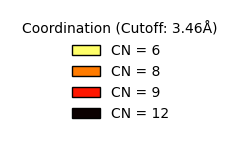

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [1]:
import pyphyschemtools as t4pPC
from pyphyschemtools import molView, nano

from ase.cluster import Icosahedron
ico = Icosahedron('Au', noshells=5)
v = molView(ico,'ase','cpk',cpk_scale=1.0,w=400,h=400)
print(v.msg)

nano.view_coordination(ico, color_map="hot_r")

# End

In [ ]:
t4pPC.end()